# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data





In [ ]:
credit_df = pd.read_csv('./sample_data/credit.csv')
credit_df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
credit_df.drop(['ID'],axis = 1,inplace = True)
#removing ["MARRIAGE"] == 0 and  ["EDUCATION"] == 0
credit_df = credit_df.loc[(credit_df['EDUCATION'] != 0) & (credit_df['MARRIAGE'] != 0)]
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
(credit_df).columns
#Checking for missing values
credit_df.isnull().sum()
#describe data
credit_df.describe()


# Exploratory Data Analysis

<Figure size 2500x1000 with 0 Axes>

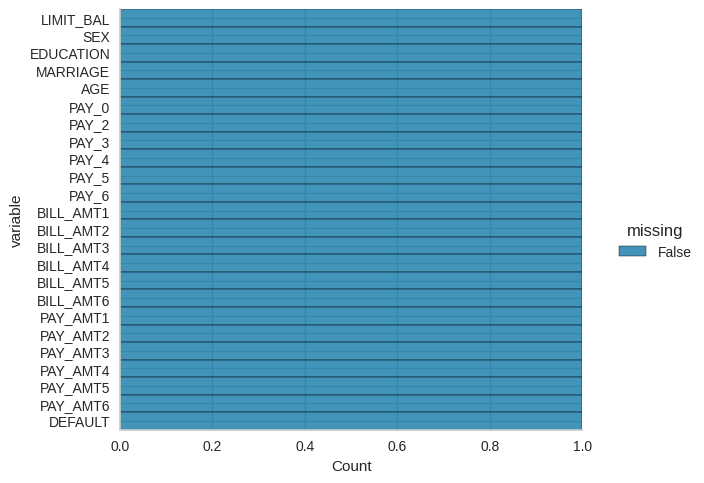

In [ ]:
plt.figure(figsize=(25,10))
sns.displot(
    data=credit_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
#plt.savefig("missing_data.png", dpi=100)
plt.show()

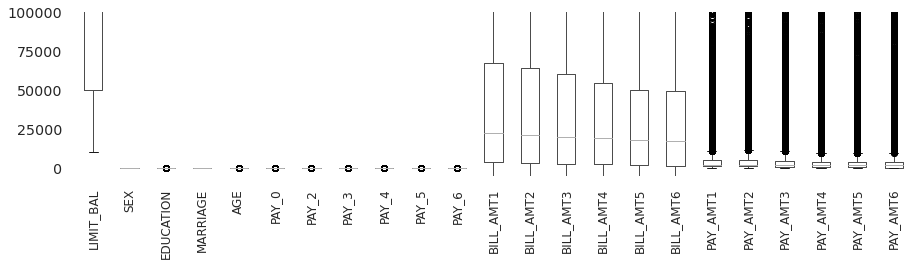

In [ ]:
# data are distributed in a wide range (below), need to be normalizded.
plt.figure(figsize=(15,3))
ax= credit_df.boxplot(credit_df.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
#ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.box(False);

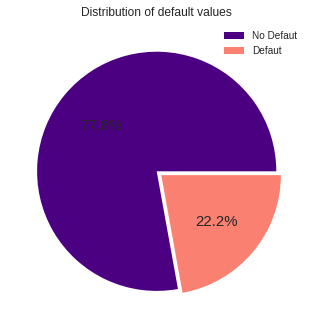

In [ ]:
credit_df['DEFAULT'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', explode = [0,0.05],
                                         colors = ['indigo','salmon'], textprops = {"fontsize":15})
plt.title('Distribution of default values')
plt.axis('off')
plt.legend(labels=['No Defaut', 'Defaut'])

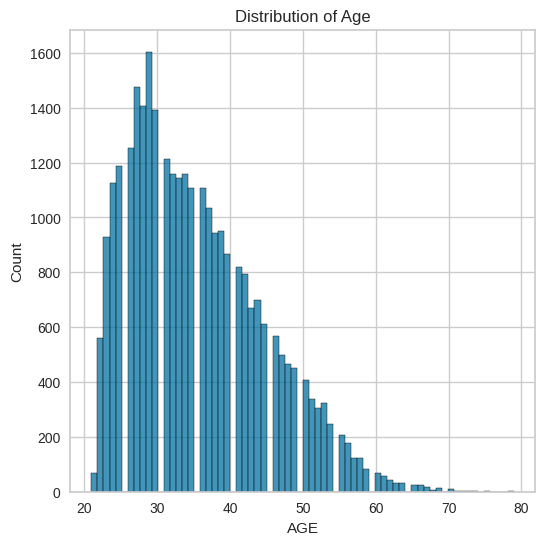

In [ ]:
#Age
plt.figure(figsize = (6,6))
plt.title('Distribution of Age')
sns.histplot(credit_df['AGE'])
plt.show()

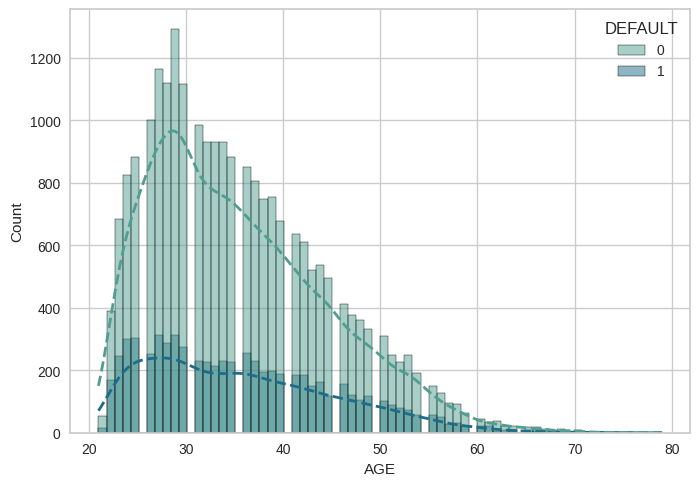

In [ ]:
## Age
sns.histplot(data=credit_df, x='AGE', hue='DEFAULT', palette = 'crest',
            kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

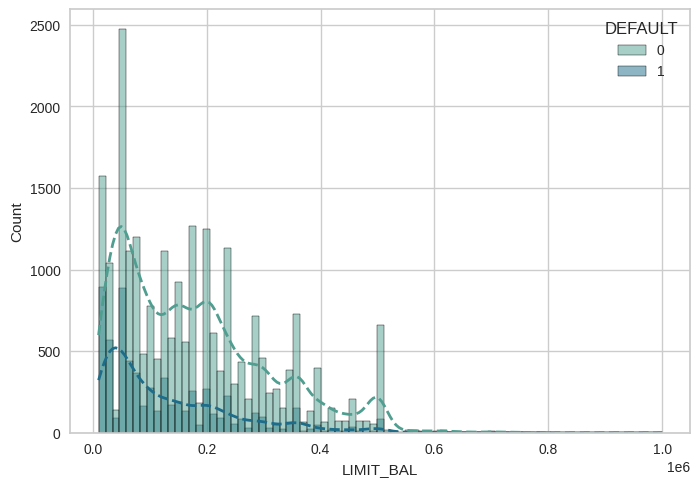

In [ ]:
## Balance Limit

sns.histplot(data=credit_df, x='LIMIT_BAL', hue='DEFAULT', palette = 'crest',
             kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

<ipython-input-26-8cdc9cb55b75>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="LIMIT_BAL", x='EDUCATION', palette ="rainbow", data=credit_df)


<Axes: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

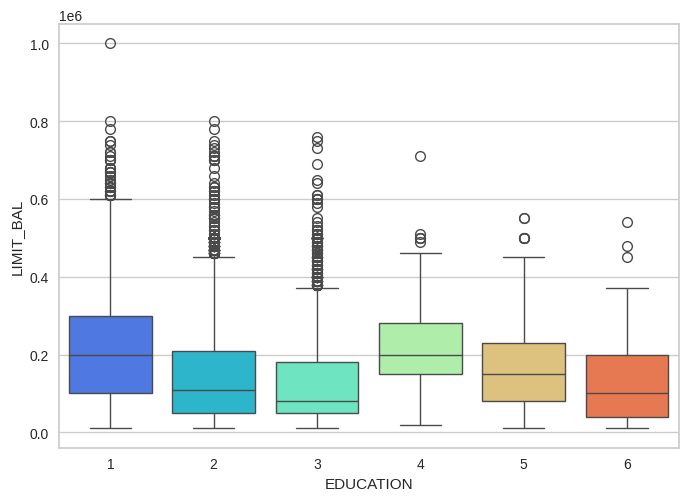

In [ ]:
#Limit Ballance, Education, and Marriage
sns.boxplot(y="LIMIT_BAL", x='EDUCATION', palette ="rainbow", data=credit_df)

([<matplotlib.axis.XTick at 0x7b1280d3d510>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

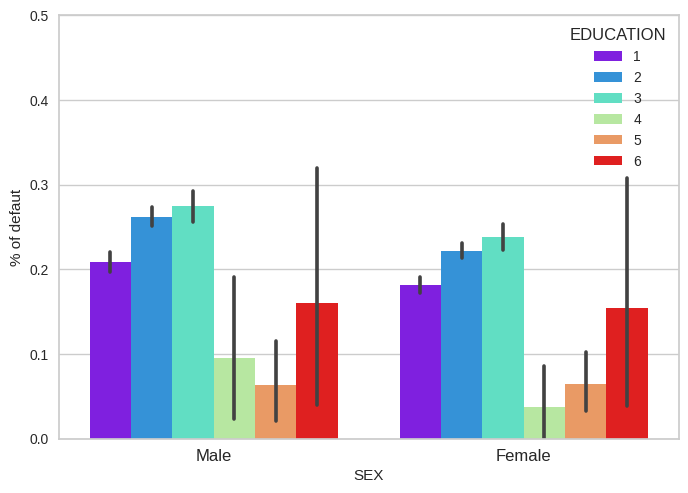

In [ ]:
# Sex and default
sns.barplot(x = "SEX", y = "DEFAULT", hue = "EDUCATION", palette ="rainbow", data = credit_df)

plt.ylabel("% of defaut")
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

([<matplotlib.axis.XTick at 0x7b128161c850>,
 [Text(0, 0, 'Single'), Text(1, 0, 'Married')])

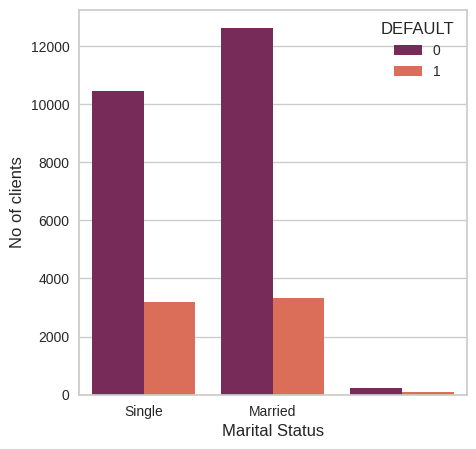

In [ ]:
# Default by Marriage (can be used by education, sex, etc)
plt.figure(figsize = (5,5))
sns.countplot( x = 'MARRIAGE', hue="DEFAULT", data = credit_df, palette="rocket")
plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("No of clients", fontsize= 12)
plt.xticks([0,1],['Single', 'Married'])



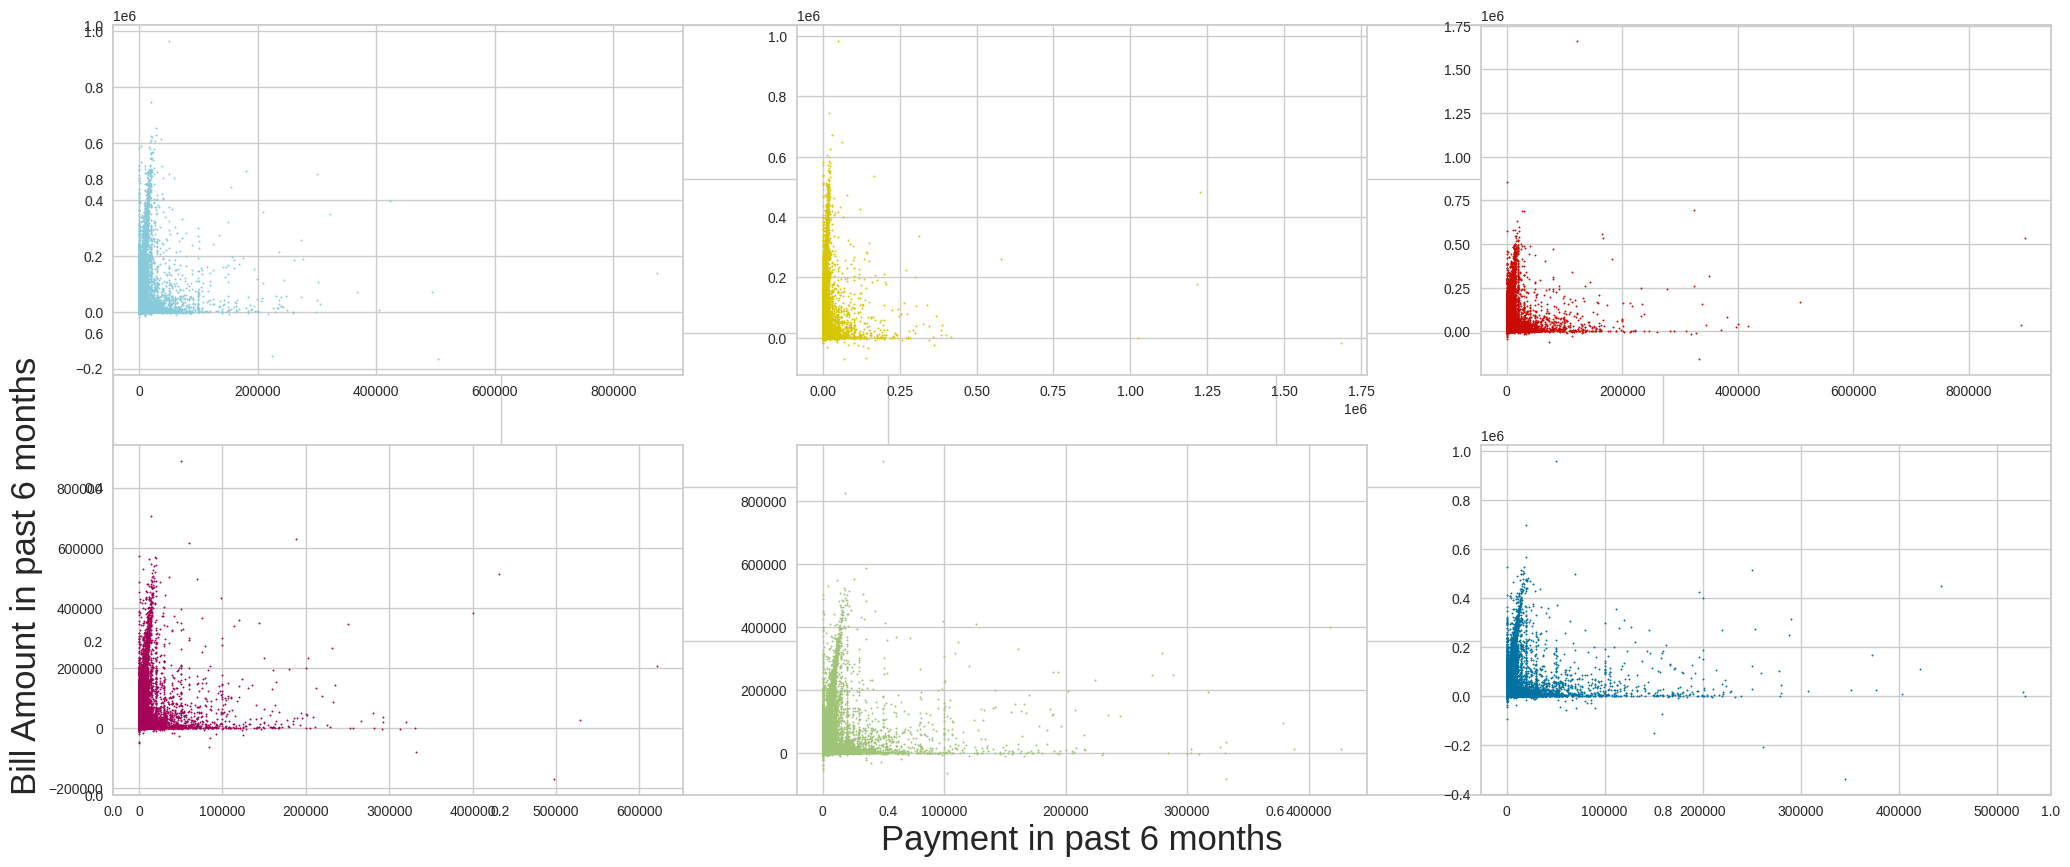

In [ ]:
df= credit_df
plt.subplots(figsize=(25,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='c', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='y', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='r', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='m', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25, loc = 'bottom')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='g', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='b', s=1)

plt.show()

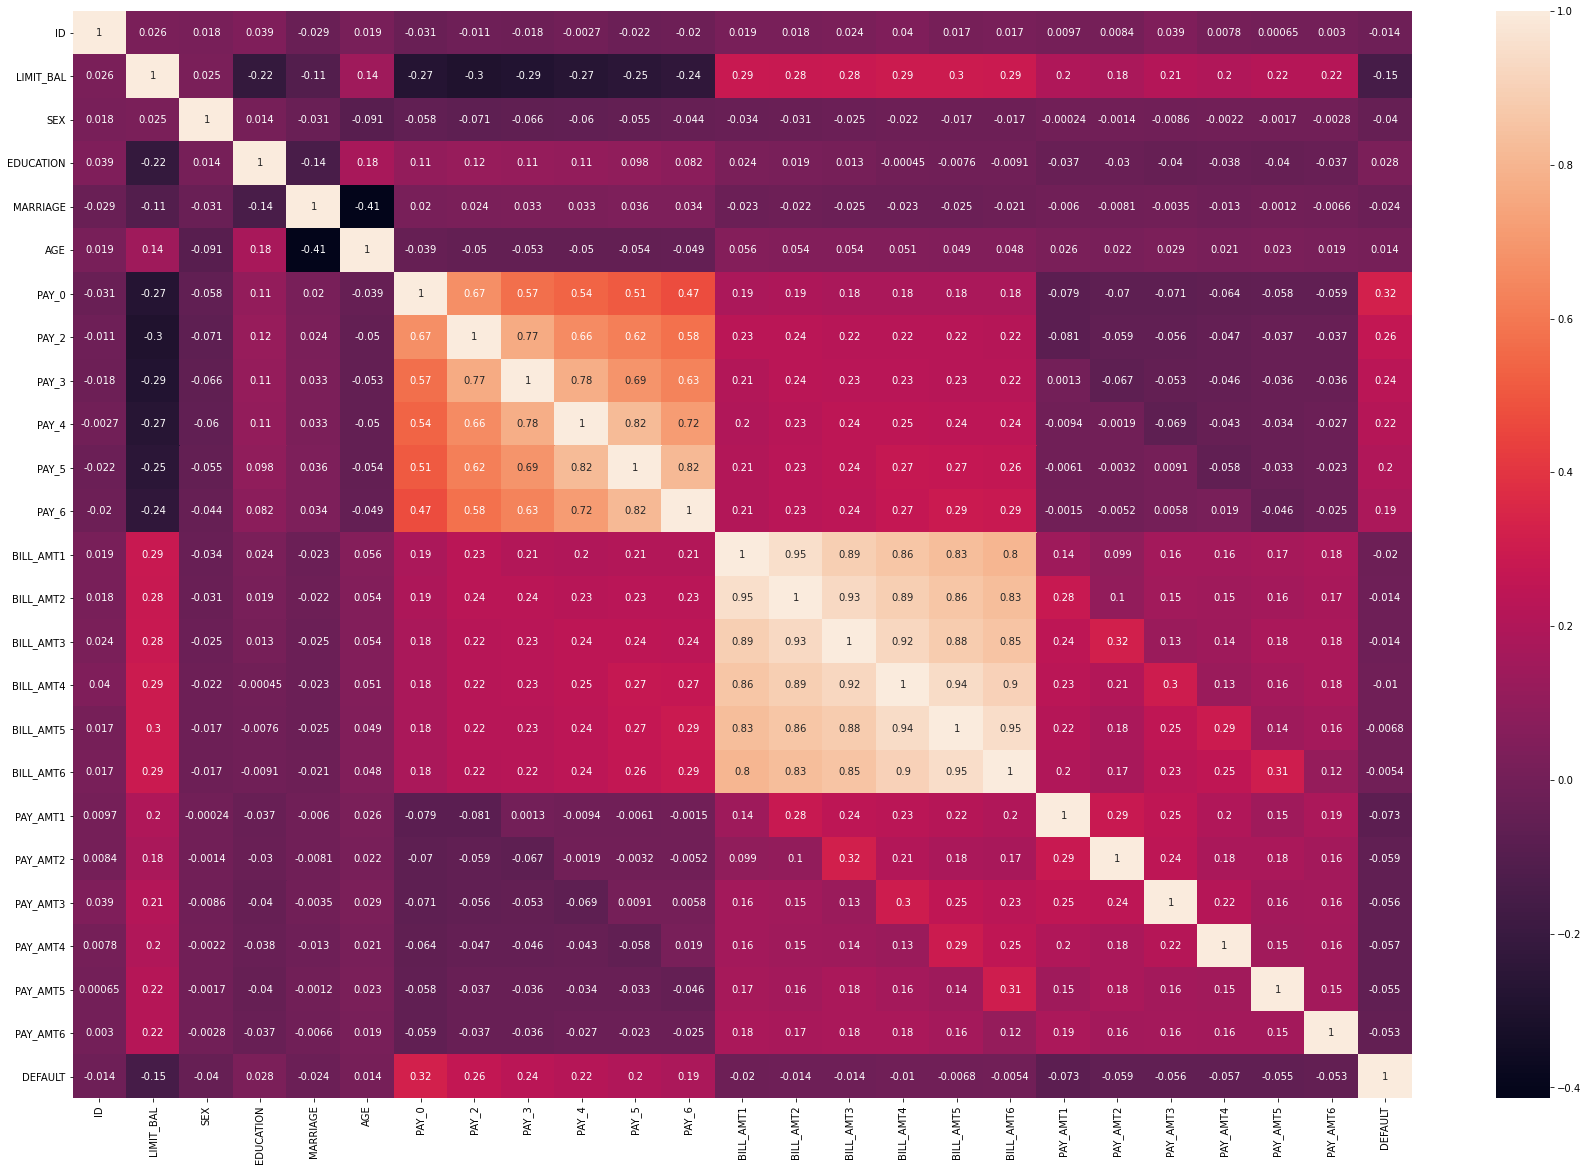

In [ ]:
# correlation matrix
plt.subplots(figsize=(30,20))
sns.heatmap(credit_df.corr(), annot=True)
plt.show()